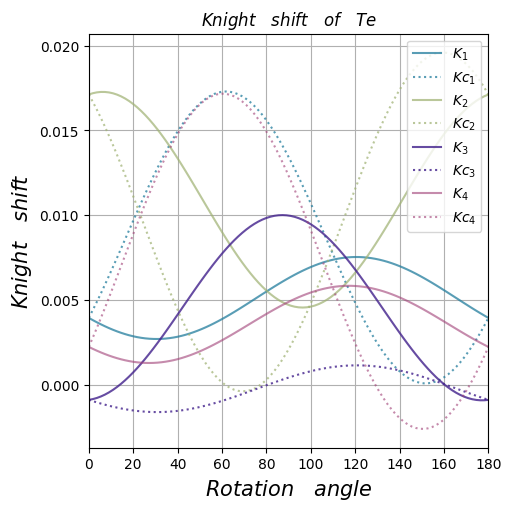

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# パラメータの入力
l = int(input("結晶中に、同じ原子は何個ありますか？: "))
kx = int(input("原子の回転軸ベクトルのx座標: "))
ky = int(input("原子の回転軸ベクトルのy座標: "))
kz = int(input("原子の回転軸ベクトルのz座標: "))
t = int(input("回転角度は？（度数法で）: "))

# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)
axes.set_xlim([0, 180])
axes.set_xticks(np.linspace(0, 180, 10))
axes.grid()

x = np.linspace(0, 180, 100)

# 単位ベクトルの生成
def generate_unit_vectors():
    k = np.array(random.sample(range(1, 100), 3))
    n = k / np.linalg.norm(k)
    return n, generate_perpendicular_unit_vector(n)

# 磁場ベクトルの生成
def generate_perpendicular_unit_vector(n):
    if np.all(n == 0):
        raise ValueError("The input vector n should not be the zero vector.")
    
    if abs(n[0]) < abs(n[1]) and abs(n[0]) < abs(n[2]):
        w = np.array([1, 0, 0])
    elif abs(n[1]) < abs(n[0]) and abs(n[1]) < abs(n[2]):
        w = np.array([0, 1, 0])
    else:
        w = np.array([0, 0, 1])
    
    perp_vec = np.cross(n, w)
    return perp_vec / np.linalg.norm(perp_vec)

n, s = generate_unit_vectors()
c = np.cross(n, s)
theta = np.radians(x)

# ロドリゲスの回転公式
def rodrigues_rotation(axis, vec, theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return (vec[:, np.newaxis] * cos_theta + 
            np.cross(axis[:, np.newaxis], vec[:, np.newaxis] * sin_theta, axis=0) + 
            axis[:, np.newaxis] * np.dot(axis, vec) * (1 - cos_theta))

h = rodrigues_rotation(n, s, theta)
hc = rodrigues_rotation(c, s, theta)

# 回転行列
def rotation_matrix(kx, ky, kz, t, l):
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

R = rotation_matrix(kx, ky, kz, t, l)

# ナイトシフトの磁場角度依存性
def calculate_knight_shift(R, h, hc, K):
    K_rot_values = []
    Kc_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R, np.dot(K, np.dot(np.linalg.inv(R), h_vec))))
        K_rot_values.append(K_rot)
        
        hc_vec = np.array([hc[0][j], hc[1][j], hc[2][j]])
        Kc_rot = np.dot(hc_vec.T, np.dot(R, np.dot(K, np.dot(np.linalg.inv(R), hc_vec))))
        Kc_rot_values.append(Kc_rot)
    return K_rot_values, Kc_rot_values

colors = np.random.rand(l, l)

# プロット
for i in range(l):
    XX, XY, YY, YZ, ZZ, XZ = [random.uniform(1e-4, 1e-2) for _ in range(6)]
    K = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    K_rot_values, Kc_rot_values = calculate_knight_shift(R[i], h, hc, K)
    axes.plot(x, K_rot_values, color=colors[i], label=f'$K_{i+1}$')
    axes.plot(x, Kc_rot_values, ":", color=colors[i], label=f'$Kc_{i+1}$')

axes.legend()
plt.autoscale(enable=True, axis='y')
plt.show()